,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.002727,0.011536,-0.023803,...,-0.005193,0.021617,-0.016925,-0.008211,-0.001798,0.020672,-0.002701,-0.138557,-0.011572,0.009915
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.266398,0.397370,0.036056,...,0.323799,0.053953,0.126424,-0.053402,0.306692,0.022036,0.585241,0.082845,-0.009928,0.003727
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.006834,0.080008,0.026496,...,0.302808,0.155670,0.018389,-0.154092,-0.009951,0.132054,0.393406,0.030690,-0.001046,-0.009949
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063744,0.188386,-0.126479,...,0.283440,0.507173,0.050544,-0.204786,0.024280,0.224903,0.569884,0.088303,0.007543,-0.026577
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.103854,0.284709,-0.059445,...,0.435130,0.318152,0.055308,-0.199802,0.052155,0.241214,0.756402,0.184342,0.012112,-0.029014
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021632,0.074900,-0.008830,...,0.015418,0.052946,0.007686,-0.129586,-0.085514,0.230227,0.144763,0.718204,-0.002591,0.005628
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.023755,0.028814,-0.264075,...,-0.245715,0.489193,0.006427,-0.059541,0.049239,0.125943,0.280102,-0.010722,0.014245,-0.022352
waterfront,-0.002727,0.266398,-0.006834,0.063744,0.103854,0.021632,0.023755,1.000000,0.401971,0.016611,...,0.080559,-0.026153,0.092873,0.030272,-0.014306,-0.041904,0.086507,0.030781,0.008148,-0.004168
view,0.011536,0.397370,0.080008,0.188386,0.284709,0.074900,0.028814,0.401971,1.000000,0.045999,...,0.277078,-0.053636,0.103951,0.084622,0.005871,-0.078107,0.280681,0.072904,-0.005398,0.001268
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016611,0.045999,1.000000,...,0.173849,-0.361592,-0.060788,0.002888,-0.015102,-0.105877,-0.093072,-0.003126,0.022388,-0.045898


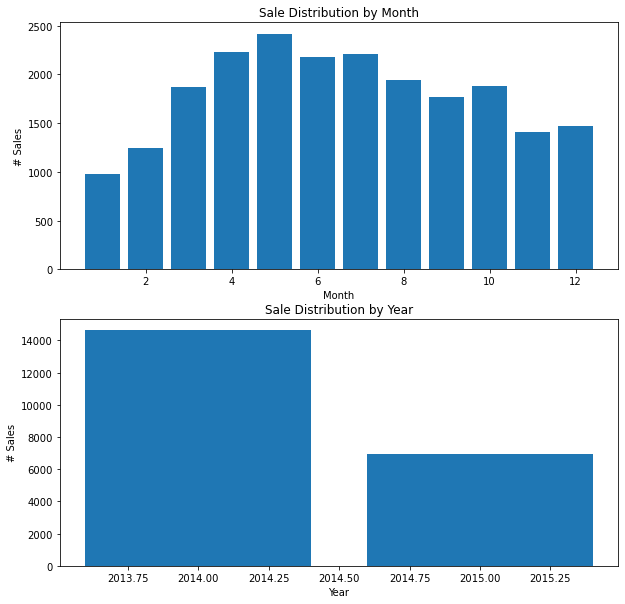

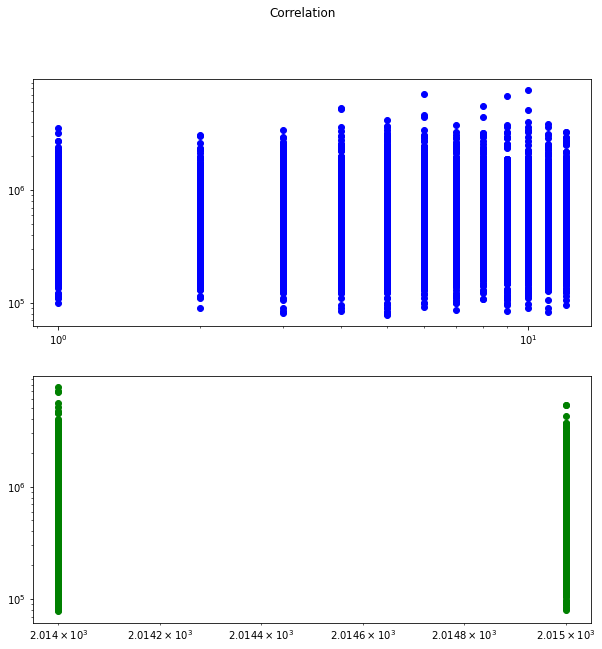

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
#1
df = pd.read_csv('kc_house_data.csv')
df['month'] = pd.DatetimeIndex(df['date']).month
df['year'] = pd.DatetimeIndex(df['date']).year
month = df['month'].value_counts()
year = df['year'].value_counts()

f, (m, y) = plt.subplots(2, figsize=(10,10))
m.bar(month.index.tolist(), month)
m.set_title('Sale Distribution by Month')
m.set_xlabel('Month')
m.set_ylabel('# Sales')
y.bar(year.index.tolist(), year)
y.set_title('Sale Distribution by Year')
y.set_xlabel('Year')
y.set_ylabel('# Sales')

# Correlation Plots
f, (price_month, price_year) = plt.subplots(2, figsize=(10,10))
f.suptitle('Correlation')
price_month.scatter(df['month'], df['price'], c='b')
price_month.set_xscale('log')
price_month.set_yscale('log')

price_year.scatter(df['year'], df['price'], c='g')
price_year.set_xscale('log')
price_year.set_yscale('log')

df.corr(method='pearson')
# Month - Price : -0.009928
# Year - Price : 0.003727


#2 Sale numbers Vs. (years,months) and Sale prices correlation Vs. (years,months)

In [ ]:
sns.barplot(year.index.tolist(),year)
plt.title("2014 and 2015 sale numbers")

Text(0.5, 1.0, 'sale numbers in each month')

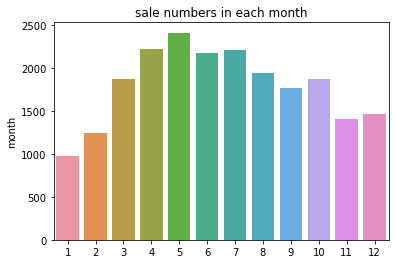

In [27]:
sns.barplot(month.index.tolist(),month)
plt.title("sale numbers in each month")

Text(0.5, 1.0, 'Price vs. Year')

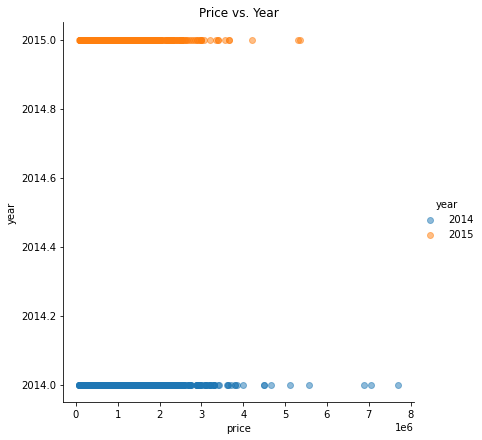

In [38]:
g=sns.FacetGrid(df,hue='year',height=6)
g.map(plt.scatter,'price','year',alpha=0.5)
g.add_legend()
plt.title("Price vs. Year")

Text(0.5, 1.0, 'Price vs. month')

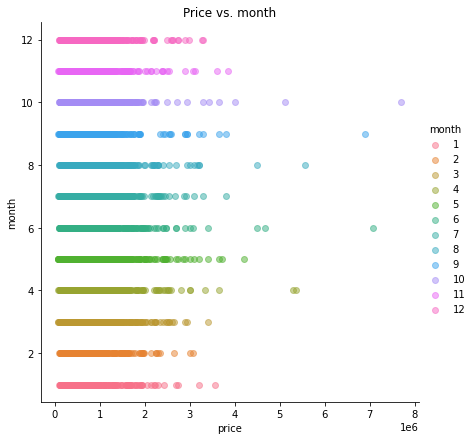

In [39]:
g=sns.FacetGrid(df,hue='month',height=6)
g.map(plt.scatter,'price','month',alpha=0.5)
g.add_legend()
plt.title("Price vs. month")

In [41]:
print("Price correlation with year: ",df['price'].corr(df['year']))
print("Price correlation with month: ",df['price'].corr(df['month']))

Price correlation with year:  0.003727139624315499
Price correlation with month:  -0.009928289245273971


In [3]:
#3

#4 Create the scoring function for 'Grade' with accuracy:70%

In [56]:
X=df[['price','bedrooms','bathrooms','sqft_living15','sqft_lot15','floors','waterfront',"condition","yr_built","zipcode","view",
      "yr_renovated"]]
y=df['grade']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [57]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_predit=clf.predict(X_test)

In [77]:
variables = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
variables

price            0.210261
sqft_living15    0.198976
yr_built         0.147715
sqft_lot15       0.129857
zipcode          0.098277
bathrooms        0.088454
floors           0.039449
bedrooms         0.038396
condition        0.022991
view             0.015726
yr_renovated     0.008604
waterfront       0.001294
dtype: float64

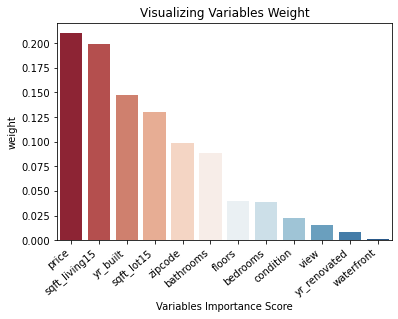

In [79]:
ax=sns.barplot(x=variables.index, y=variables,palette=sns.color_palette("RdBu", 12))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
# Add labels to your graph
plt.xlabel('Variables Importance Score')
plt.ylabel('weight')
plt.title("Visualizing Variables Weight")
plt.show()

In [74]:
from sklearn import metrics
print("Scoring function accuracy:",metrics.accuracy_score(y_test, y_predit))

Scoring function accuracy: 0.6986111111111111


In [ ]:
#5
import seaborn as sns

wealthy = df.loc[df['price'] >= 3000000]

ax = sns.scatterplot(x=wealthy.lat, y=wealthy.long, hue=wealthy.price)